In [12]:
import numpy as np
import napari
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from skimage import data
from skimage.io import imread
from os import listdir
%gui qt
warnings.simplefilter('ignore')

# Get image names

In [2]:
path_images_dir = './images/'

files = listdir(path_images_dir)
names = []
for file in files:
    if file[-4:]=='.tif':
        names.append(file[:-4])
names = sorted(names)

# Load one image and predictions

In [10]:
name = names[6]
im = imread('./images/%s.tif' % name)
df = pd.read_csv('./predictions/%s_predictions.csv' % name)
x_list, y_list = [], []
for ind in df.index:
    x = (df.xmax[ind] + df.xmin[ind])/2
    y = (df.ymax[ind] + df.ymin[ind])/2
    x_list.append(x)
    y_list.append(y)
df['x'] = x_list
df['y'] = y_list
print(name)

image-cropped-rescaled-20201002-131101-2


# Filter down the predictions

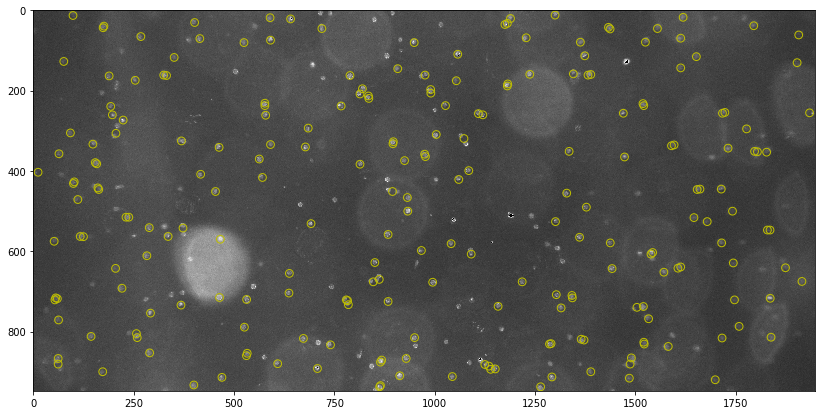

In [11]:
df_filtered = df[df.prob>0.999]
plt.figure(figsize=(21,7))
plt.scatter(df_filtered.x, df_filtered.y, facecolor='None', edgecolor='y', s=60)
plt.imshow(im, cmap='gray')
plt.show()

# Napari viewer from prediction

In [7]:
viewer = napari.view_image(im)
points = np.array([[y, x] for x, y in zip(df_filtered.x, df_filtered.y)])
viewer.add_points(points, symbol='ring', size=15, face_color='y', edge_color='y', opacity=0.2)

<Points layer 'points' at 0x1a234ac450>

# Napari viewer from napari

In [58]:
# name = names[0]
# im = imread('./images/%s.tif' % name)

In [62]:
df = pd.read_csv('./adjusted_points/%s.csv' % name)
viewer = napari.view_image(im)
points = np.array([[x, y] for x, y in zip(df['axis-0'], df['axis-1'])])
viewer.add_points(points, symbol='ring', size=15, face_color='y', edge_color='y', opacity=0.2)

<Points layer 'points' at 0x1a38a35510>

# Check GT

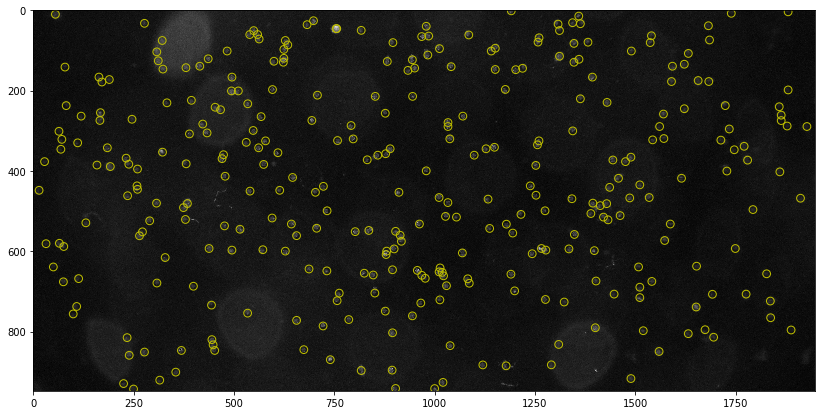

In [9]:
df2 = pd.read_csv('./done/%s_gt.csv' % name)
plt.figure(figsize=(21,7))
plt.scatter(df2['axis-1'], df2['axis-0'], facecolor='None', edgecolor='y', s=60)
plt.imshow(im, cmap='gray')
plt.show()